## 1.0 Import and setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2.0 Loading datasets

In [10]:
df_customers = pd.read_csv(r"C:\Users\Hp\Videos\projects\unsupervised-machine-learning-RupiaMorris\data\retail_customer_data.csv")
df_transactions = pd.read_csv(r"C:\Users\Hp\Videos\projects\unsupervised-machine-learning-RupiaMorris\data\customer_transactions.csv")

In [11]:
print("Customers Data")
display(df_customers.head())
print("Shape:", df_customers.shape)

Customers Data


,customer_id,age,gender,annual_income,education,marital_status,city,state,country,postal_code,...,food_score,website_visits_per_month,avg_session_duration,mobile_app_usage,desktop_usage,items_viewed_per_visit,cart_abandonment_rate,email_engagement_rate,support_tickets,satisfaction_score
0,7e58732d,58,Male,76754,High School,Divorced,Curtisfurt,CT,US,47553,...,48,3,11.70,6,96,7,54,0,1,7.0
1,5371a919,19,Non-binary,36083,Associate Degree,Widowed,New Jessica,GA,US,61090,...,30,2,8.08,95,0,12,59,16,1,5.6
2,4a71a294,42,Male,45852,Bachelor Degree,Divorced,Hurstfurt,MN,US,29247,...,64,2,9.21,91,18,7,40,65,0,6.9
3,23165a5e,30,Non-binary,34021,High School,Single,Teresaburgh,NY,US,14448,...,28,5,4.24,17,79,13,51,23,1,6.4
4,dcb1e818,62,Non-binary,90889,High School,Married,East Donna,OH,US,22144,...,30,1,8.77,75,12,15,62,42,0,6.9


Shape: (1000, 32)


In [12]:
print("\nTransaction Data")
display(df_transactions.head())
print("shape:", df_transactions.shape)


Transaction Data


,transaction_id,customer_id,transaction_date,transaction_amount,item_category,item_count
0,T000000,bd20895a,2023-06-03,49.79,Beauty,1
1,T000001,4ee7299f,2025-02-10,16.14,Food,2
2,T000002,56aa2a5b,2023-02-04,41.66,Beauty,2
3,T000003,51ac415d,2024-10-11,13.23,Sports,3
4,T000004,7698bf76,2025-03-12,8.42,Beauty,1


shape: (10000, 6)


## 3.0 Checking Missing Values and Data Types

In [13]:
print("Missing values in customers")
print(df_customers.isnull().sum())

print("\nMissing values in Transactions")
print(df_transactions.isnull().sum())

Missing values in customers
customer_id                 0
age                         0
gender                      0
annual_income               0
education                   0
marital_status              0
city                        0
state                       0
country                     0
postal_code                 0
signup_date                 0
purchase_frequency          0
avg_purchase_value          0
total_spent                 0
days_since_last_purchase    0
favorite_payment_method     0
electronics_score           0
clothing_score              0
home_decor_score            0
beauty_score                0
sports_score                0
books_score                 0
food_score                  0
website_visits_per_month    0
avg_session_duration        0
mobile_app_usage            0
desktop_usage               0
items_viewed_per_visit      0
cart_abandonment_rate       0
email_engagement_rate       0
support_tickets             0
satisfaction_score          0
dtype: int64

In [14]:
df_customers.info()
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1000 non-null   object 
 1   age                       1000 non-null   int64  
 2   gender                    1000 non-null   object 
 3   annual_income             1000 non-null   int64  
 4   education                 1000 non-null   object 
 5   marital_status            1000 non-null   object 
 6   city                      1000 non-null   object 
 7   state                     1000 non-null   object 
 8   country                   1000 non-null   object 
 9   postal_code               1000 non-null   int64  
 10  signup_date               1000 non-null   object 
 11  purchase_frequency        1000 non-null   int64  
 12  avg_purchase_value        1000 non-null   float64
 13  total_spent               1000 non-null   float64
 14  days_sinc

## 4.0 Basic Stats for Numeric Columns

In [16]:
df_customers.describe()

,age,annual_income,postal_code,purchase_frequency,avg_purchase_value,total_spent,days_since_last_purchase,electronics_score,clothing_score,home_decor_score,...,food_score,website_visits_per_month,avg_session_duration,mobile_app_usage,desktop_usage,items_viewed_per_visit,cart_abandonment_rate,email_engagement_rate,support_tickets,satisfaction_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,46.849000,67893.698000,50302.844000,8.145000,38.011950,319.83385,60.319000,48.955000,49.609000,49.403000,...,48.828000,4.797000,14.46913,51.373000,48.249000,9.282000,50.372000,38.084000,1.18000,6.719200
std,16.583221,35964.928189,28762.821338,3.611512,23.527329,265.35732,35.105978,20.888689,20.817817,21.334896,...,20.818641,2.655342,6.83541,28.838751,28.890061,5.521681,16.196108,22.718254,1.16058,1.126419
min,18.000000,13230.000000,536.000000,0.000000,15.000000,0.00000,1.000000,0.000000,4.000000,1.000000,...,1.000000,0.000000,-6.05000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,3.900000
25%,33.000000,42394.750000,26266.000000,5.000000,15.000000,120.00000,29.000000,33.000000,34.000000,34.000000,...,34.750000,3.000000,9.80750,27.000000,23.000000,5.000000,39.000000,21.000000,0.00000,6.000000
50%,47.000000,60912.000000,50732.000000,8.000000,33.200000,234.16000,59.000000,49.000000,49.000000,49.000000,...,48.000000,5.000000,14.28000,51.000000,48.000000,9.000000,51.000000,39.000000,1.00000,6.800000
75%,61.000000,84901.000000,75573.000000,11.000000,53.180000,427.58250,92.000000,64.000000,65.000000,65.000000,...,64.000000,6.000000,18.84750,75.000000,73.000000,13.000000,61.000000,54.000000,2.00000,7.600000
max,75.000000,289534.000000,99837.000000,21.000000,153.860000,1611.42000,120.000000,99.000000,100.000000,100.000000,...,99.000000,13.000000,37.82000,100.000000,100.000000,28.000000,100.000000,100.000000,9.00000,9.100000


In [18]:
df_transactions.describe()

,transaction_amount,item_count
count,10000.000000,10000.000000
mean,37.948390,2.130700
std,27.789876,1.251868
min,5.000000,1.000000
25%,16.940000,1.000000
50%,29.525000,2.000000
75%,51.742500,3.000000
max,223.970000,9.000000


## 5.0 Key Visuals

Distributions:

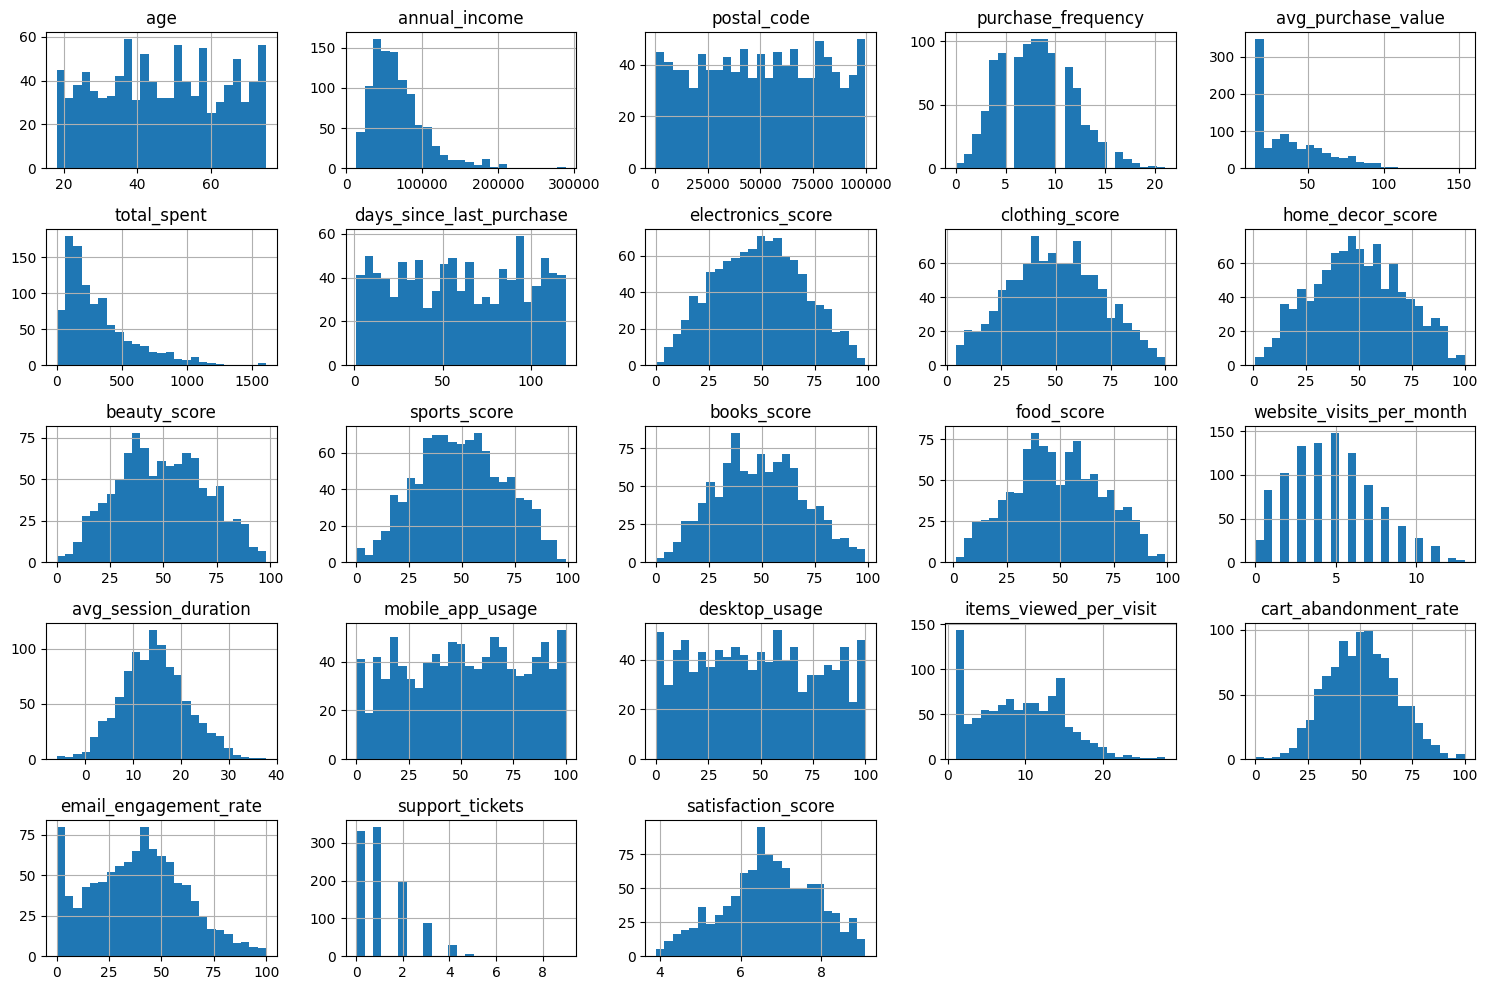

In [19]:
# Histogram for numerical columns in customer data
df_customers.select_dtypes(include=np.number).hist(figsize=(15, 10), bins=25)
plt.tight_layout()
plt.show()

## 
Correlation Heatmap (customer dataset):

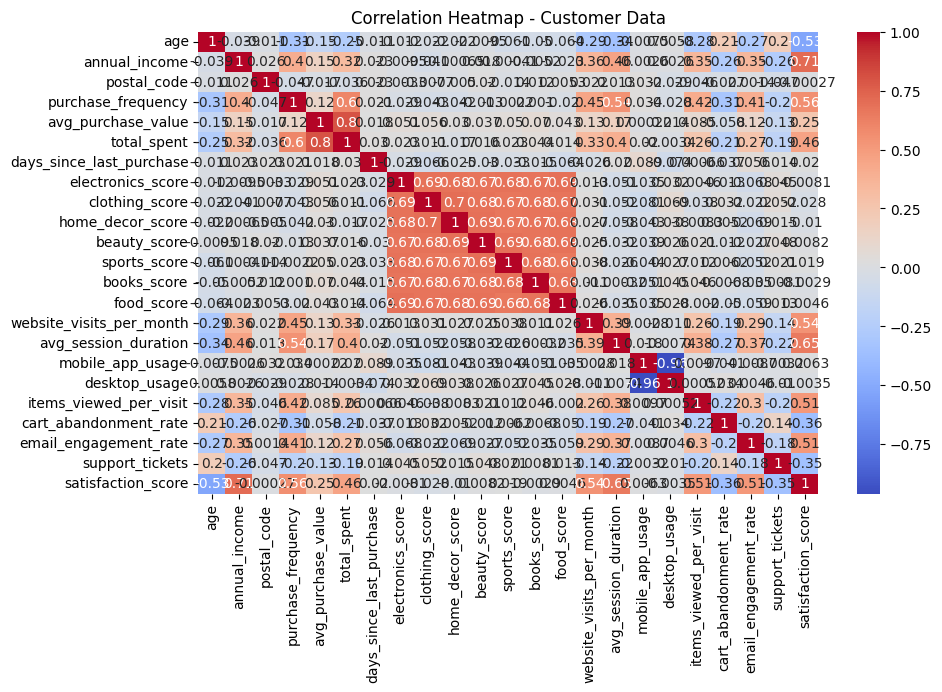

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_customers.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Customer Data')
plt.show()

## Check for Relationships Between Datasets

In [21]:
common_columns = set(df_customers.columns).intersection(df_transactions.columns)
print("Common columns:", common_columns)

Common columns: {'customer_id'}


In [22]:
# How many customer_ids overlap?
overlap = df_customers['customer_id'].isin(df_transactions['customer_id']).sum()
print(f"Overlapping customer IDs: {overlap} / {len(df_customers)}")

Overlapping customer IDs: 1000 / 1000


In [23]:
merged_df = pd.merge(df_customers, df_transactions, on='customer_id', how='left')
print("\nMerged Data Preview:")
display(merged_df.head())


Merged Data Preview:


,customer_id,age,gender,annual_income,education,marital_status,city,state,country,postal_code,...,items_viewed_per_visit,cart_abandonment_rate,email_engagement_rate,support_tickets,satisfaction_score,transaction_id,transaction_date,transaction_amount,item_category,item_count
0,7e58732d,58,Male,76754,High School,Divorced,Curtisfurt,CT,US,47553,...,7,54,0,1,7.0,T001210,2024-04-12,24.24,Beauty,3
1,7e58732d,58,Male,76754,High School,Divorced,Curtisfurt,CT,US,47553,...,7,54,0,1,7.0,T001298,2024-01-09,25.94,Electronics,3
2,7e58732d,58,Male,76754,High School,Divorced,Curtisfurt,CT,US,47553,...,7,54,0,1,7.0,T003029,2025-02-02,14.06,Food,1
3,7e58732d,58,Male,76754,High School,Divorced,Curtisfurt,CT,US,47553,...,7,54,0,1,7.0,T003128,2024-03-07,31.99,Clothing,2
4,7e58732d,58,Male,76754,High School,Divorced,Curtisfurt,CT,US,47553,...,7,54,0,1,7.0,T003660,2024-11-08,45.37,Beauty,1


In [27]:
# Save the merged dataset
merged_df.to_csv(r'C:\Users\Hp\Videos\projects\unsupervised-machine-learning-RupiaMorris\data/merged_customer_data.csv', index=False)

print("✅ Merged dataset saved as 'data/merged_customer_data.csv'")

✅ Merged dataset saved as 'data/merged_customer_data.csv'
